<a href="https://colab.research.google.com/github/RVictorCruz/DesafioIV-Data-Science/blob/main/desafio_finalizado_5_trilhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5º Desafio - Ciência de Dados

## ---- Raimundo Victor

- ***Lançamento:* 08/07**
- ***Entrega:* até o dia 28/07**
- **Desafio individual**

**🫡Sua missão :**

<aside>
🛠 Utilizando suas habilidades ninja em Python e bibliotecas como Pandas e Seaborn, você deve aplicá-las para:

</aside>

1. Substituir o cabeçalho por palavras em letras maiúsculas;
2. Corrigir os dados faltantes e preencher as lacunas com valores adequados;
3. Eliminar os outliers, atribuindo no lugar deles os valores adequados;
4. Eliminar os duplicados, para garantir a unicidade das informações;
5. Substituir os NANs por valores adequados;
6. Corrigir os dados categóricos, por exemplo, "Mas" para "Masculino" e "Fem" para "Feminino" para adequá-los ao padrão dos demais;
7. Vá além das dicas fornecidas, para melhorar a sua habilidade em limpeza e tratamento de dados.

#IMPORTACAO DE BIBLIOTECAS

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/content/Planilha do desafio 5 - Ciência de dados - Relatório do Banco x.csv')
df.head()

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


 # Substitui os nomes das colunas por letras maiúsculas

In [22]:

df.columns = df.columns.str.upper()
df.head()


,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


#GENERO

In [26]:
df['GENERO'].value_counts()

GENERO
Masculino    521
Feminino     461
M              6
F              2
Fem            1
Name: count, dtype: int64

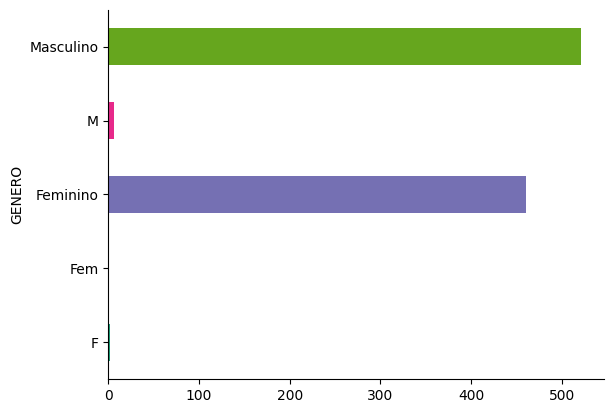

In [25]:
df.groupby('GENERO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Corrigir os dados categóricos, por exemplo, "Mas" para "Masculino" e "Fem" para "Feminino" para adequá-los ao padrão dos demais

In [30]:
df['GENERO'] = df['GENERO'].replace({'M': 'Masculino', 'F': 'Feminino','Fem':'Feminino'})
df['GENERO'].value_counts()

GENERO
Masculino    527
Feminino     464
Name: count, dtype: int64

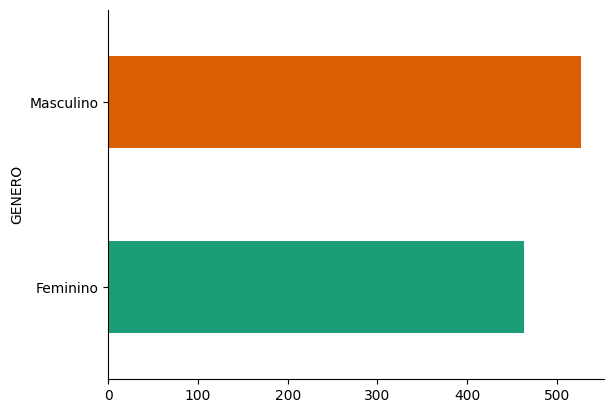

In [29]:
df.groupby('GENERO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# valores nulos

In [9]:
df.isnull().sum()

ID                0
PONTOS            0
ESTADO            0
GENERO            8
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           7
SAIU              0
dtype: int64

In [8]:
nulos_genero = df[df['GENERO'].isna()]
nulos_genero

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
64,65,603,MG,NaN,26,4,10916637,1,1,1,9284067.0,0
84,86,493,MA,NaN,46,4,0,2,1,0,190766.0,0
213,215,676,MA,NaN,34,1,6309501,1,1,1,4064581.0,0
296,298,714,MA,NaN,31,4,12516926,1,1,1,10663689.0,0
370,372,801,CE,NaN,42,4,14194767,1,1,1,1059829.0,0
501,503,692,MA,NaN,54,5,0,2,1,1,8872184.0,0
963,965,529,CE,NaN,63,4,9613411,3,1,0,10873296.0,1
969,971,649,CE,NaN,70,9,11685471,2,0,1,10712579.0,0


# Calcular a moda da coluna 'GENERO'

In [ ]:
moda_genero = df['GENERO'].mode()[0]
moda_genero

'Masculino'

In [ ]:
# Substituir os valores nulos pela moda
df['GENERO'].fillna(moda_genero, inplace=True)

In [ ]:
# valores NaN
df.isna().sum()

ID                0
PONTOS            0
ESTADO            0
GENERO            0
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           0
SAIU              0
dtype: int64

# Imputando valores faltantes com a média da coluna para colunas numéricas

In [ ]:
for column in df.select_dtypes(include=['number']):
    df[column] = df[column].fillna(df[column].mean())

# Imputando valores faltantes com a moda da coluna para colunas categóricas

In [ ]:
for column in df.select_dtypes(include=['category']):
    df[column] = df[column].fillna(df[column].mode()[0])


# Verificando se ainda existem valores faltantes

In [ ]:
print(df.isnull().sum())


ID                0
PONTOS            0
ESTADO            0
GENERO            0
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           0
SAIU              0
dtype: int64


In [32]:
df

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


##Verificação de Outiliers

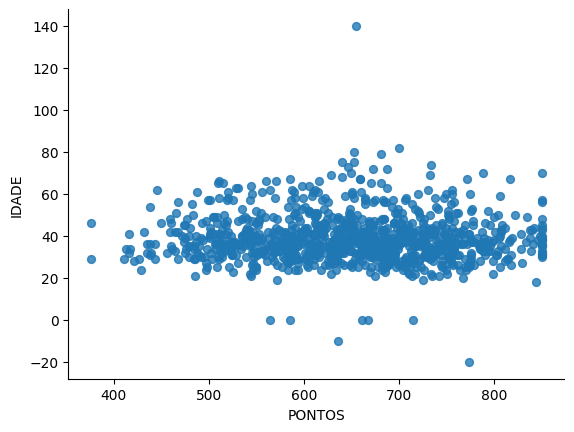

In [35]:
# @title PONTOS vs IDADE
df.plot(kind='scatter', x='PONTOS', y='IDADE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


Outliers na coluna 'IDADE':
      ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
58    59     511     CE   Feminino     66     4               0        1   
85    87     652     CE   Feminino     75    10               0        2   
104  106     670     CE   Feminino     65     1               0        1   
158  160     646     MA   Feminino     73     6         9725925        1   
181  183     510     MA  Masculino     65     2               0        2   
230  232     673     MA  Masculino     72     1               0        2   
234  236     585     MA   Feminino     67     5        11397897        2   
243  245     659     CE  Masculino     67     6         1174116        1   
252  254     681     MA   Feminino     79     0               0        2   
310  312     652     MA   Feminino     80     4               0        2   
364  366     640     MA  Masculino     68     9               0        2   
371  373     640     CE   Feminino     75     1        10630

## Verificar outliers na coluna 'IDADE'

In [ ]:
outliers_idade = identify_outliers_iqr(df, 'IDADE')
print("Outliers na coluna 'IDADE':")
print(outliers_idade)

## Manter a Última Ocorrência

In [ ]:
df.drop_duplicates(keep='last', inplace=True)


## Eliminar Duplicados Baseados em Colunas Específicas

In [ ]:
df.drop_duplicates(subset=['ID', 'GENERO'], inplace=True)

##Resetar o Índice Após Remover Duplicados


In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)


## Verificar duplicados

In [10]:
duplicados = df.duplicated()
duplicados

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

In [ ]:
print(df[duplicados])

Empty DataFrame
Columns: [ID, PONTOS, ESTADO, GENERO, IDADE, BENS, SALDO NA CONTA, PRODUTO, POSSUI CARTAO, ATIVO, SALARIO, SAIU]
Index: []


## Identificar idades negativas

In [17]:
idades_negativas = df[df['IDADE'] <= 0]
idades_negativas


Linhas com idades negativas:
      ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
851  853     667     CE   Feminino    0.0     1         9713392        2   
887  889     585     MA  Masculino    0.0     2               0        2   
930  932     661     CE  Masculino    0.0     6        13262898        1   
931  933     564     CE  Masculino    0.0     9        10352275        2   
947  949     715     MA   Feminino    0.0     5        11859041        1   

     POSSUI CARTAO  ATIVO     SALARIO  SAIU  
851              0      0  11331677.0     1  
887              1      1   1865777.0     0  
930              0      0   3881267.0     0  
931              1      1   3433821.0     0  
947              1      1    568417.0     1  


## Exibir idades negativas

In [ ]:
print("\nLinhas com idades negativas:")
print(idades_negativas)

## Calcular a média das idades não negativas


In [14]:
media_idades = df[df['IDADE'] >= 0]['IDADE'].mean()


# Substituir idades negativas pela média das idades não negativas

In [ ]:
df.loc[df['IDADE'] < 0, 'IDADE'] = media_idades

## Exibir o DataFrame após a correção


In [16]:
print("\nDataFrame após substituir as idades negativas pela média das idades não negativas:")
print(df)


DataFrame após substituir as idades negativas pela média das idades não negativas:
       ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0       1     619     BA   Feminino   42.0     2               0        1   
1       2     608     CE   Feminino   41.0     1         8380786        1   
2       3     502     BA   Feminino   42.0     8         1596608        3   
3       4     699     BA   Feminino   39.0     1               0        2   
4       5     850     CE   Feminino   43.0     2        12551082        1   
..    ...     ...    ...        ...    ...   ...             ...      ...   
994   996     838     CE  Masculino   43.0     9        12310588        2   
995   997     610     CE  Masculino   29.0     9               0        3   
996   998     811     CE  Masculino   44.0     3               0        2   
997   999     587     CE  Masculino   62.0     7        12128627        1   
998  1000     811     CE   Feminino   28.0     4        16773882     